<a href="https://colab.research.google.com/github/kakkiichan/Machine-Learning/blob/master/Unsupervised/Iris_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
ds = load_iris()

In [45]:
iris_data = ds.data
iris_target = ds.target
iris_feature= ds.feature_names

iris = pd.DataFrame(data=iris_data,columns=iris_feature)
iris_target =pd.DataFrame(data=iris_target,columns=["class"])

iris=iris.join(iris_target)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


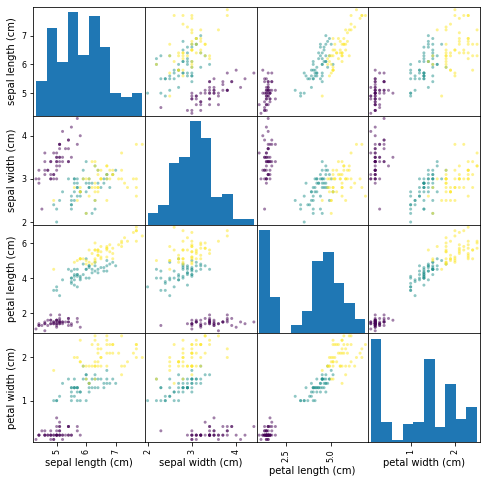

In [39]:
from pandas import plotting 
plotting.scatter_matrix(iris.iloc[:, :4],c=list(iris.iloc[:,4]), figsize=(8, 8))
plt.show()

In [44]:
iris_n = iris.iloc[:, :4].apply(lambda x: (x-x.mean())/x.std(), axis=0)
iris_n.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [0]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(iris_n)
# データを主成分空間に写像
feature = pca.transform(iris_n)

In [48]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(iris_n.columns))]).head()

,PC1,PC2,PC3,PC4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803


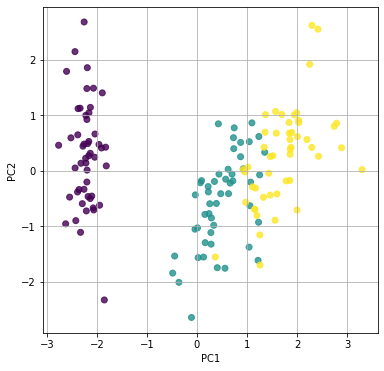

In [50]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(iris.iloc[:, 4]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()